In [203]:
!ls

Untitled.ipynb       data_description.txt train.csv


In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
data = pd.read_csv('train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [206]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Ultimate goal is to find factors affecting price of sale price

In [207]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

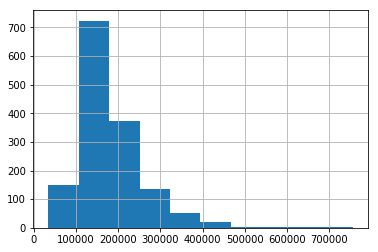

In [208]:
data.SalePrice.hist()
plt.show()

In [209]:
corr = data.corr()
corr[['SalePrice']].sort_values(by='SalePrice',ascending=False).style.background_gradient()


,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


### OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,etc are strongly correalted with SalePrice

### lets check out relations with some of the values

In [210]:
data.SalePrice.skew()

1.8828757597682129

In [211]:
data.SalePrice.kurtosis()

6.536281860064529

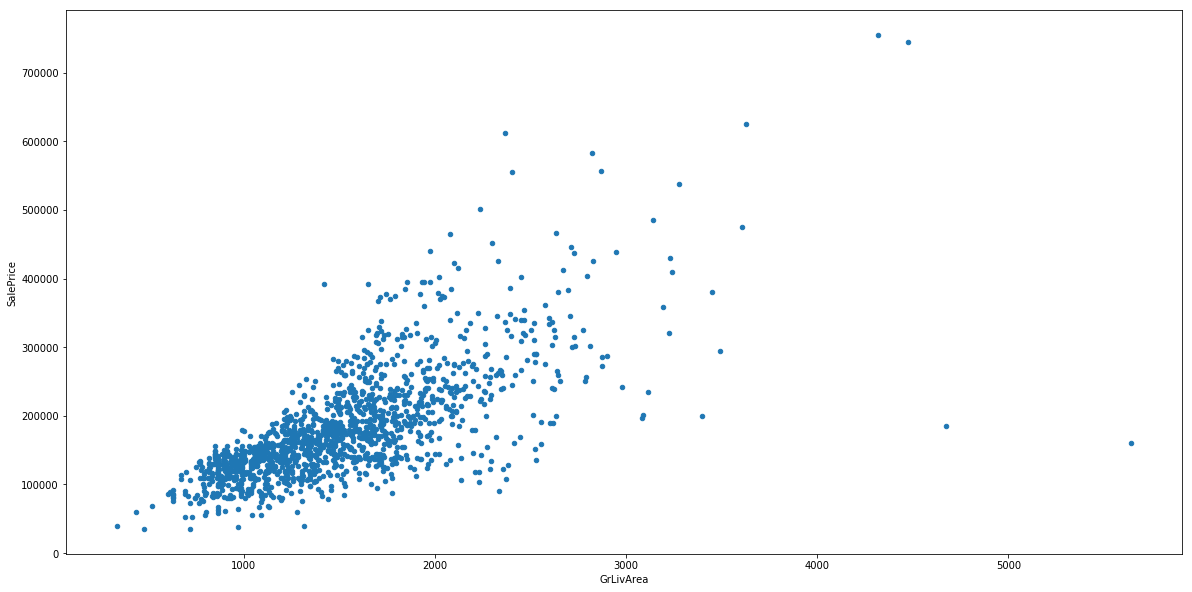

In [212]:
var='SalePrice'
data.plot(kind='scatter',y=var,x='GrLivArea',figsize=(20,10))

### The rightmost two observation are outliers,though above 2 are also outliers but they seem follow the trend

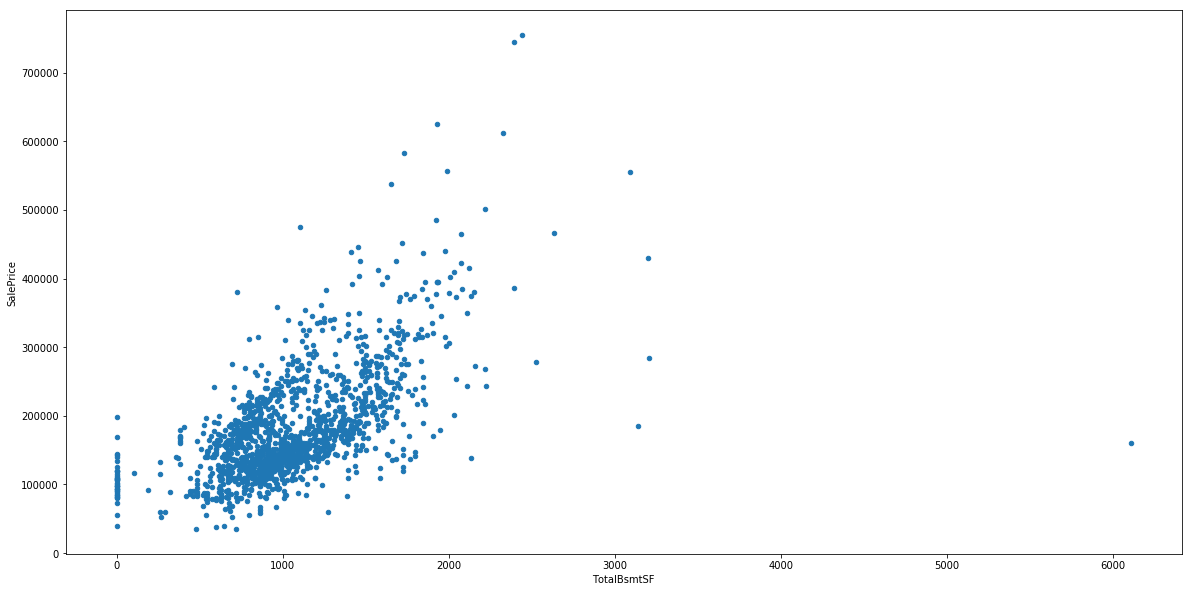

In [213]:
data.plot(kind='scatter',y=var,x='TotalBsmtSF',figsize=(20,10))

### Again a linear relationship,but some of them contibute 0

# Moreover,they are forming a conical shape,this needs to be changed

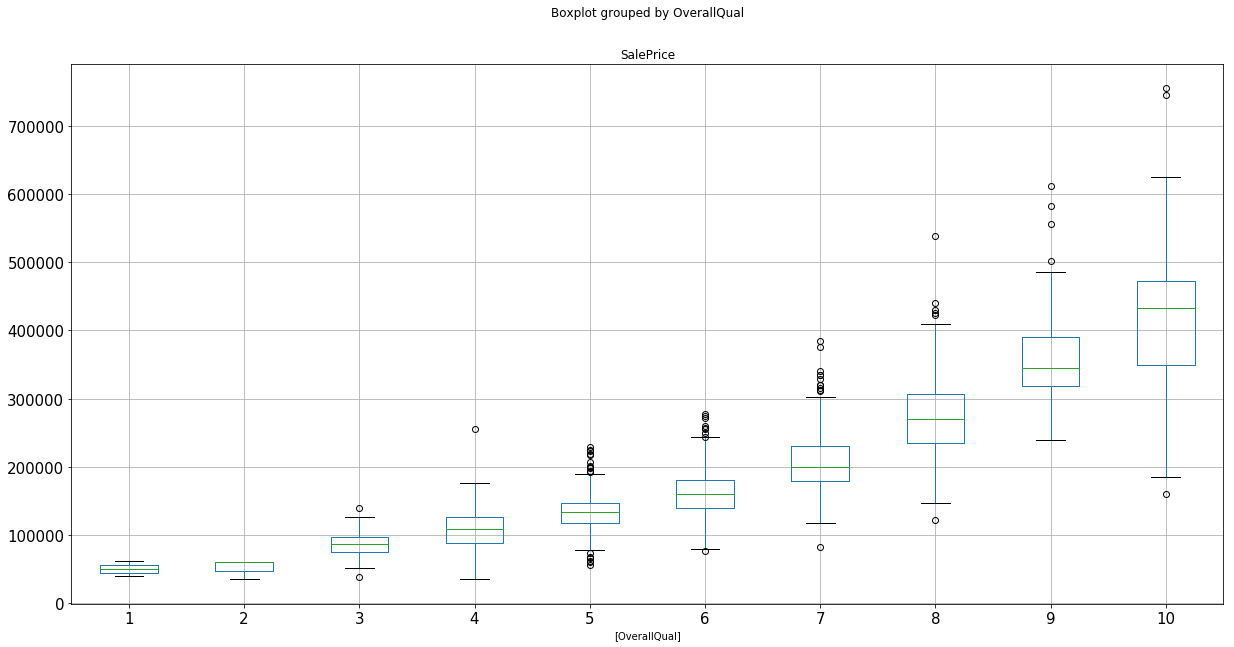

In [214]:
data[['SalePrice','OverallQual']].boxplot(by='OverallQual',figsize=(20,10),fontsize=15)


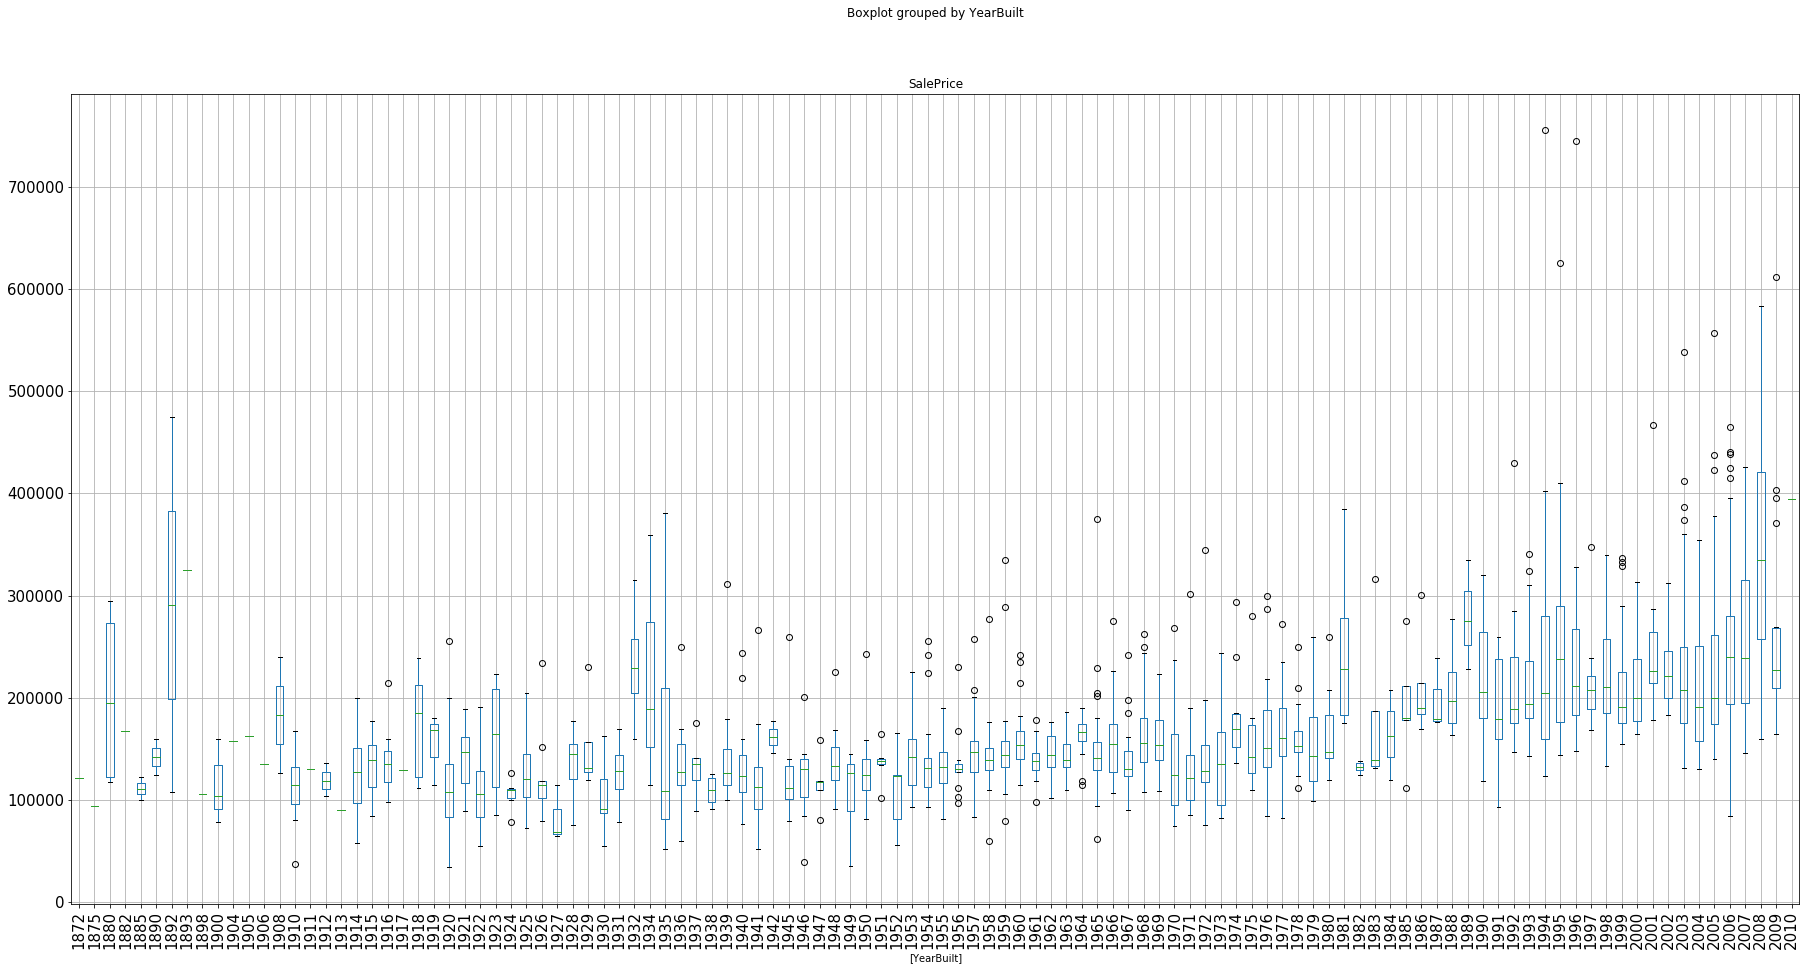

In [215]:
data[['SalePrice','YearBuilt']].boxplot(by='YearBuilt',figsize=(30,15),fontsize=15,rot=90)


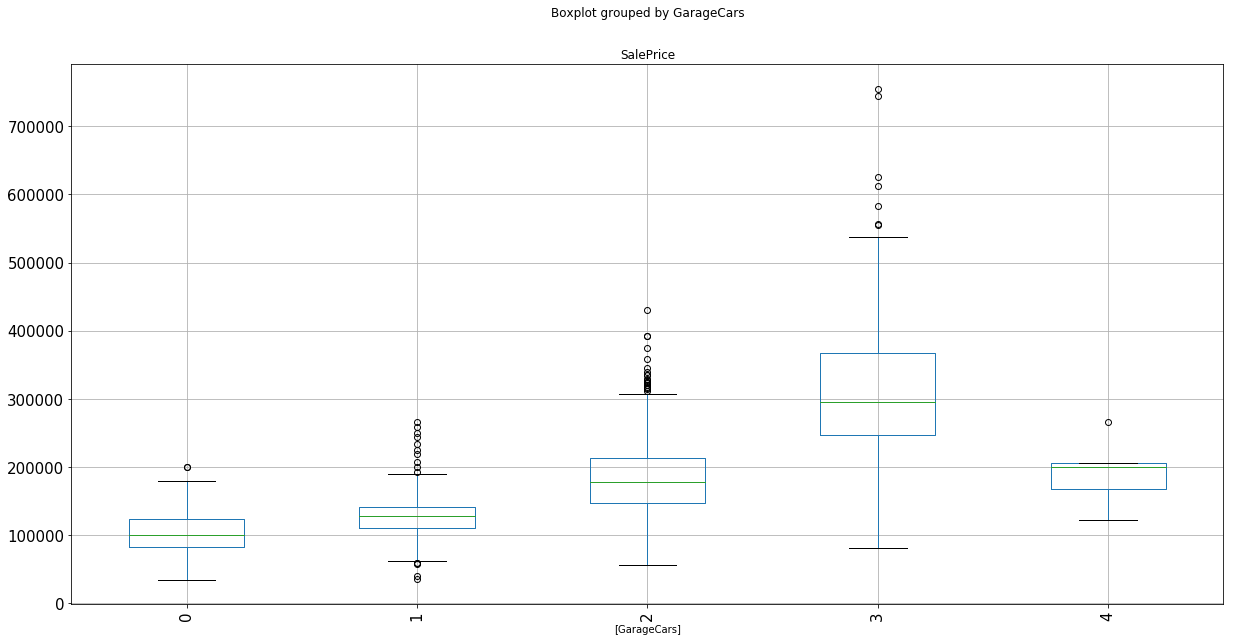

In [216]:
data[['SalePrice','GarageCars']].boxplot(by='GarageCars',figsize=(20,10),fontsize=15,rot=90)

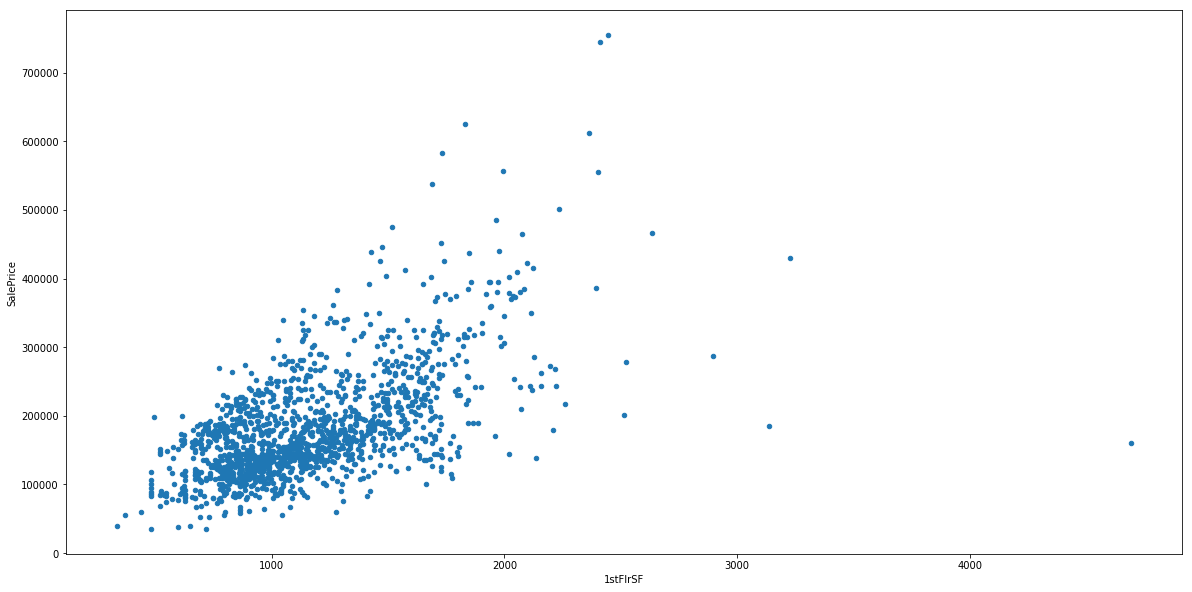

In [217]:
data[['SalePrice','1stFlrSF']].plot(kind='scatter',x='1stFlrSF',y='SalePrice',figsize=(20,10))

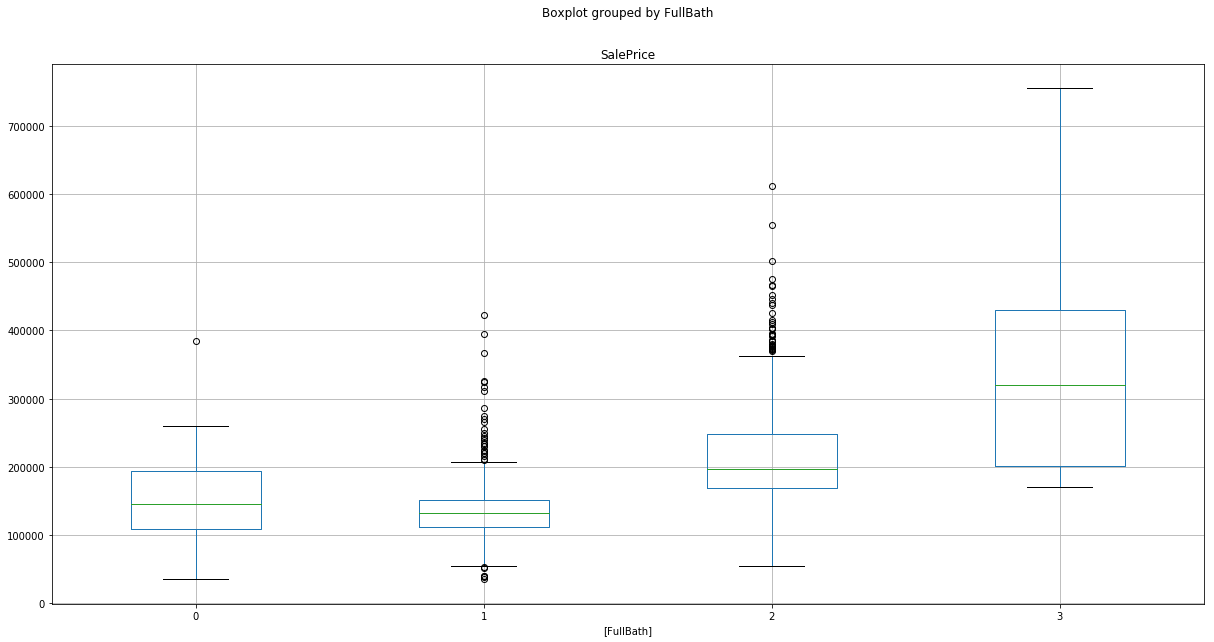

In [218]:
data[['SalePrice','FullBath']].boxplot(by='FullBath',figsize=(20,10))

## Handling Missing Data

In [220]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)[0:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

## Looks like 19 columns have null value,columns which are having above 15% null values can easily be discarded as they would not contribute much, moreover they are not realated a/c to correlation matrix

In [221]:
data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True)

In [222]:
df=data.isnull().sum().sort_values(ascending=False)
df=pd.concat([df,df/data.shape[0]],axis=1,keys=['Total','Percent']).head(15)
df

,Total,Percent
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342


### we should drop observation where electrical is null as it is only 1, GarageX variales are same 81 where they all are none,moreover we are interested in GarageCar which is not null so we will be dropping those columns and for rest we have taken Total bsmt so the others 4 are not in our interest

In [226]:
data.drop((df[df['Total']>1]).index,1,inplace=True)


In [228]:
data.drop((data.loc[data.Electrical.isnull()]).index,inplace=True)

In [229]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)[0:20]

SalePrice       0.0
OverallQual     0.0
BsmtUnfSF       0.0
BsmtFinSF2      0.0
BsmtFinSF1      0.0
Foundation      0.0
ExterCond       0.0
ExterQual       0.0
Exterior2nd     0.0
Exterior1st     0.0
RoofMatl        0.0
RoofStyle       0.0
YearRemodAdd    0.0
YearBuilt       0.0
OverallCond     0.0
HouseStyle      0.0
Heating         0.0
BldgType        0.0
Condition2      0.0
Condition1      0.0
dtype: float64

### Looks like all null data has been handled,Cheers

### lets look at our graphs once again

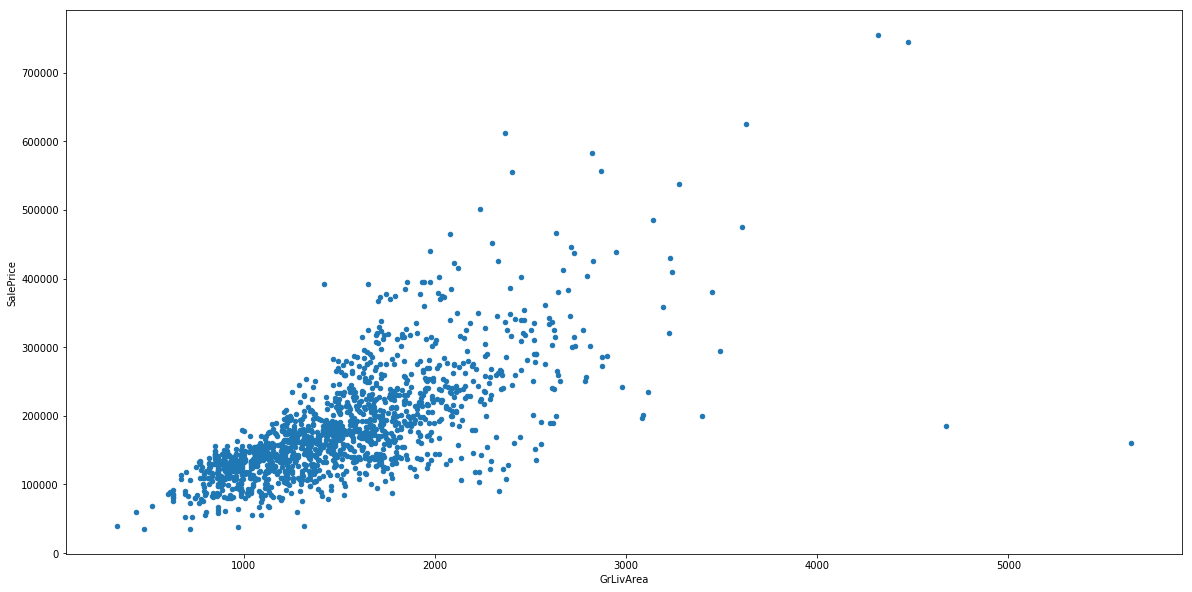

In [230]:
data.plot(kind='scatter',y=var,x='GrLivArea',figsize=(20,10))

### The rightmost columns are outliers,maybe the landvalue is low

In [233]:
df = data.sort_values(by='GrLivArea',ascending=False)[0:2]
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [236]:
data.drop(data[data['Id']==524].index,inplace=True)

In [237]:
data.drop(data[data['Id']==1299].index,inplace=True)

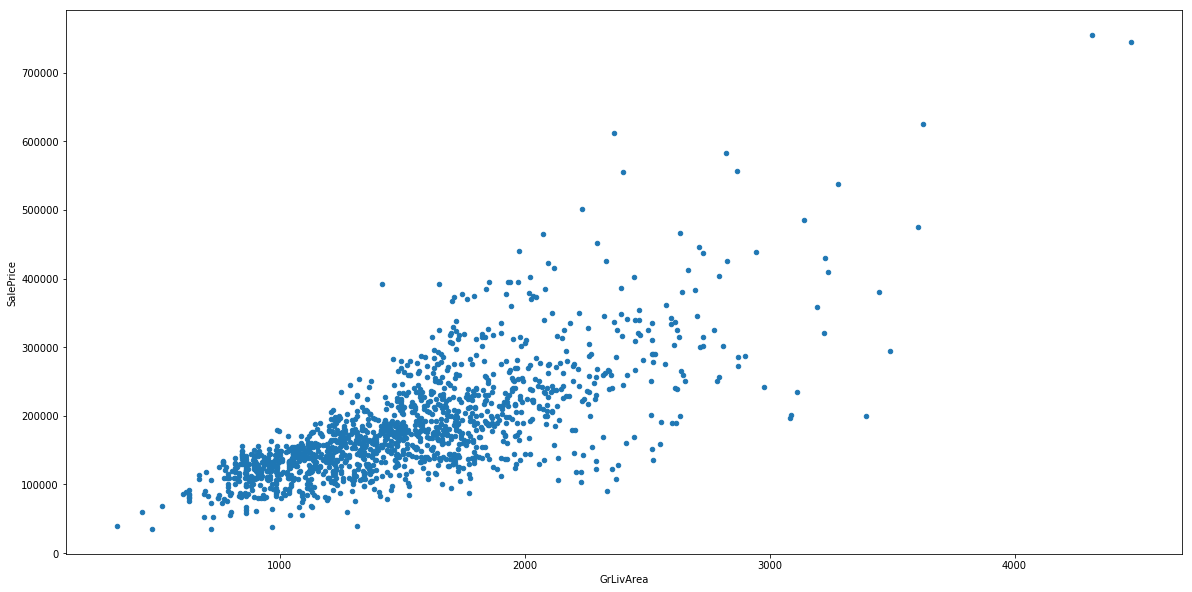

In [238]:
data.plot(kind='scatter',y=var,x='GrLivArea',figsize=(20,10))

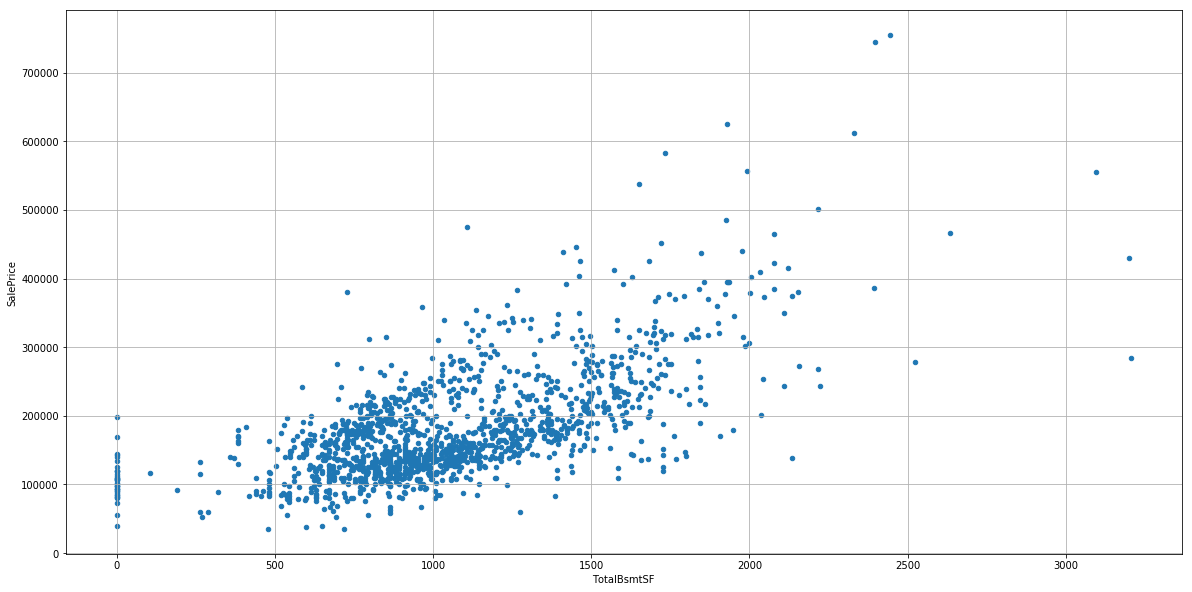

In [241]:
data.plot(kind='scatter',y=var,x='TotalBsmtSF',figsize=(20,10),grid=True)

### Again rightmost 3 are outliers

In [252]:
data[['GrLivArea']] = np.log(data[['GrLivArea']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d3705f8>]],
      dtype=object)

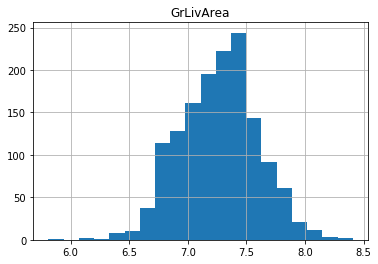

In [254]:
data[['GrLivArea']].hist(bins=20)

In [257]:
data[['SalePrice']] = np.log(data[['SalePrice']])

SalePrice    0.121551
dtype: float64

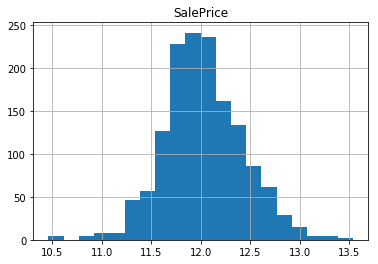

In [269]:
data[['SalePrice']].hist(bins=20)
data[['SalePrice']].skew()

In [261]:
data[['GrLivArea']].skew()

GrLivArea   -0.071958
dtype: float64

In [262]:
##much better distribution

TotalBsmtSF    0.512456
dtype: float64


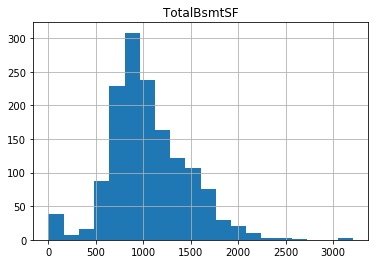

In [263]:
data[['TotalBsmtSF']].hist(bins=20)
print(data[['TotalBsmtSF']].skew())

In [267]:
data['TotalBsmtSF']=np.log(data[['TotalBsmtSF']]+1)

TotalBsmtSF   -5.174316
dtype: float64


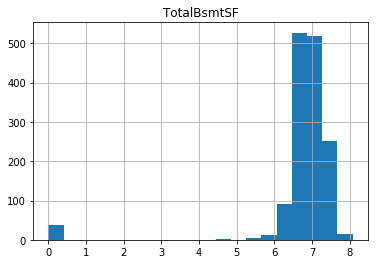

In [268]:
data[['TotalBsmtSF']].hist(bins=20)
print(data[['TotalBsmtSF']].skew())

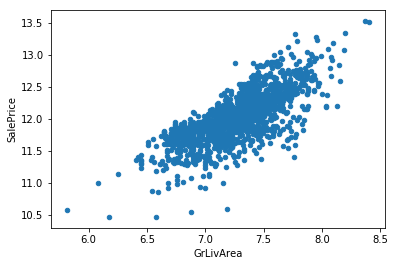

In [274]:
data.plot(kind='scatter',y=var,x='GrLivArea')

### Bingo,Linear RelationShip

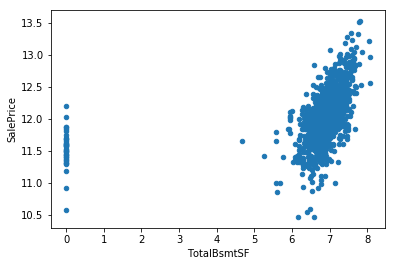

In [275]:
data.plot(kind='scatter',y=var,x='TotalBsmtSF')


### Bingo!!

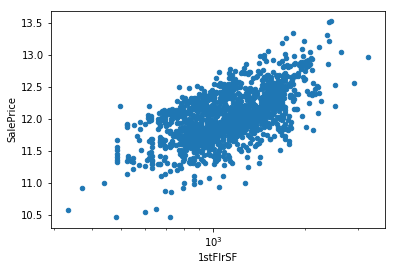

In [283]:
data.plot(kind='scatter',y=var,x='1stFlrSF',logx=True)

### Again,a Bingo, log transformation easily converts +ve skewness into linear relationship

## See you in Machine learning Model :)